In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd

books = pd.read_csv('book_cleaned.csv')

In [3]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Conspiracies,1
475,Brothers and sisters,1
476,Rock musicians,1
477,Community life,1


In [4]:
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Philosophy,117
6,Religion,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


In [5]:
books[books["categories"] == "Juvenile Fiction"].head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 : Joe and his parents are enjoyi...
79,9780020442608,0020442602,The voyage of the Dawn Treader,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0,The voyage of the Dawn Treader,"9780020442608 : The ""Dawn Treader"" is the firs..."
85,9780030547744,0030547741,Where the Red Fern Grows,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,Where the Red Fern Grows: The Story of Two Dog...,9780030547744 : A young boy living in the Ozar...
86,9780060000141,0060000147,Poppy's Return,Avi,Juvenile Fiction,http://books.google.com/books/content?id=XbcMJ...,"There's trouble at Gray House, the girlhood ho...",2006.0,3.99,256.0,1086.0,Poppy's Return,"9780060000141 : There's trouble at Gray House,..."
87,9780060001537,0060001534,Diary of a Spider,Doreen Cronin,Juvenile Fiction,http://books.google.com/books/content?id=UWvZo...,This is the diary ... of a spider. But don't b...,2005.0,4.25,40.0,7903.0,Diary of a Spider,9780060001537 : This is the diary ... of a spi...


In [6]:
books[books["categories"] == "Juvenile Nonfiction"].head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
107,9780060277406,0060277408,The Secret Garden Cookbook,Amy Cotler,Juvenile Nonfiction,http://books.google.com/books/content?id=c7E_H...,Frances Hodgson Burnett's The Secret Garden de...,1999.0,4.28,128.0,142.0,The Secret Garden Cookbook: Recipes Inspired b...,9780060277406 : Frances Hodgson Burnett's The ...
108,9780060278427,0060278420,Laura's Album,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=_zTkq...,Though best known as the author of the Little ...,1998.0,4.30,80.0,713.0,Laura's Album: A Remembrance Scrapbook of Laur...,9780060278427 : Though best known as the autho...
228,9780060782139,0060782137,Time For Kids: Butterflies!,Editors of TIME For Kids,Juvenile Nonfiction,http://books.google.com/books/content?id=OdZxn...,"Butterflies There are 20,000 different kinds o...",2006.0,4.00,32.0,20.0,Time For Kids: Butterflies!,"9780060782139 : Butterflies There are 20,000 d..."
267,9780060882600,0060882603,The Annotated Charlotte's Web,E. B. White,Juvenile Nonfiction,http://books.google.com/books/content?id=vaYYH...,"Charlotte's Web, one of America's best-loved c...",2006.0,4.16,320.0,41.0,The Annotated Charlotte's Web,"9780060882600 : Charlotte's Web, one of Americ..."
434,9780064462044,0064462048,My Little House Crafts Book,Carolyn Strom Collins,Juvenile Nonfiction,http://books.google.com/books/content?id=lTzrs...,Make the same pioneer crafts that Laura did! I...,1998.0,4.05,64.0,56.0,My Little House Crafts Book: 18 Projects from ...,9780064462044 : Make the same pioneer crafts t...


In [7]:
category_mapping = {
    # Existing categories
    'Fiction': 'Fiction',
    'Juvenile Fiction': "Children's Fiction",
    'Biography & Autobiography': 'Nonfiction',
    'History': 'Nonfiction',
    'Literary Criticism': 'Nonfiction',
    'Philosophy': 'Nonfiction',
    'Religion': 'Nonfiction',
    'Comics & Graphic Novels': 'Fiction',
    'Drama': 'Fiction',
    'Juvenile Nonfiction': "Children's Nonfiction",
    'Science': 'Nonfiction',
    'Poetry': 'Fiction',
}

books["simple_categories"] = books["categories"].map(category_mapping)

In [8]:
books[(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 : A new 'Christie for Christmas'...,NaN
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 : Lewis' work on the nature of l...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 : ""In The Problem of Pain, C.S. ...",NaN
5,9780006380832,0006380832,Empires of the Monsoon,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,Empires of the Monsoon: A History of the India...,9780006380832 : Until Vasco da Gama discovered...,NaN
6,9780006470229,000647022X,The Gap Into Madness,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,The Gap Into Madness: Chaos and Order,9780006470229 : A new-cover reissue of the fou...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,9788125026600,8125026606,Nietzsche For Beginners,Marc Sautet,NaN,http://books.google.com/books/content?id=fPIv8...,Not only does Nietzsche for Beginners delve in...,2004.0,3.26,192.0,21.0,Nietzsche For Beginners,9788125026600 : Not only does Nietzsche for Be...,NaN
5191,9788171565641,8171565646,Aspects of the Novel,E. M. Forster,English fiction,http://books.google.com/books/content?id=qWU9P...,"Forster's lively, informed originality and wit...",2004.0,3.83,141.0,10.0,Aspects of the Novel,"9788171565641 : Forster's lively, informed ori...",NaN
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 : On A Train Journey Home To Nor...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 : This book tells the tale of a ...,NaN


In [9]:
books.head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 : A NOVEL THAT READERS and criti...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 : A new 'Christie for Christmas'...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 : A memorable, mesmerizing heroi...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 : Lewis' work on the nature of l...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 : ""In The Problem of Pain, C.S. ...",NaN


In [10]:
import os
import contractions
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, DistilBertForSequenceClassification, DistilBertConfig

In [11]:
# Function to clean text
def clean(text):
    return contractions.fix(text)  # Expand contractions


# Load and clean data
train_df = books.loc[~books["simple_categories"].isna(), :].copy()
train_df["description"] = train_df["description"].apply(clean)

# Train-test split
X = train_df['description'].values
y = train_df['simple_categories'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

# Convert class labels to indices
unique_classes = np.unique(y)
class_to_index = {label: idx for idx, label in enumerate(unique_classes)}

y_train_indices = np.array([class_to_index[label] for label in y_train])
y_test_indices = np.array([class_to_index[label] for label in y_test])

In [12]:
# Initialize tokenizer and model
model_name = 'distilbert/distilbert-base-uncased'
num_classes = len(unique_classes)

bert_config = DistilBertConfig.from_pretrained(
    model_name, num_labels=num_classes)
bert_tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = DistilBertForSequenceClassification.from_pretrained(
    model_name, config=bert_config)

max_seq_len = 512

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
# Tokenize input data
x_train = bert_tokenizer(
    text=X_train.tolist(),
    add_special_tokens=True,
    max_length=max_seq_len,
    truncation=True,
    padding=True,
    return_tensors='pt',
    return_attention_mask=True
)

x_test = bert_tokenizer(
    text=X_test.tolist(),
    add_special_tokens=True,
    max_length=max_seq_len,
    truncation=True,
    padding=True,
    return_tensors='pt',
    return_attention_mask=True
)

# Convert to PyTorch tensors
y_train_tensor = torch.tensor(y_train_indices, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_indices, dtype=torch.long)

# Create datasets and DataLoaders
train_dataset = TensorDataset(
    x_train['input_ids'], x_train['attention_mask'], y_train_tensor)
test_dataset = TensorDataset(
    x_test['input_ids'], x_test['attention_mask'], y_test_tensor)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [14]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(bert_model.parameters(), lr=5e-5)

# Learning rate scheduler
def lr_lambda(step):
    return 0.9 ** (step / 10000)


scheduler = LambdaLR(optimizer, lr_lambda)

In [15]:
# Training function
def train_model(model, train_loader, optimizer, scheduler, loss_fn, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss, correct, total = 0, 0, 0
        progress_bar = tqdm(
            train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)

        for batch in progress_bar:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask).logits
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            # Compute accuracy
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            total_loss += loss.item()
            progress_bar.set_postfix(
                loss=f"{loss.item():.4f}", acc=f"{(correct/total):.4f}")

        print(
            f"Epoch {epoch+1}: Loss = {total_loss/len(train_loader):.4f}, Accuracy = {correct/total:.4f}")

# Evaluation function
def evaluate_model(model, test_loader, loss_fn):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        progress_bar = tqdm(test_loader, desc="Evaluating", leave=False)

        for batch in progress_bar:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            outputs = model(input_ids, attention_mask=attention_mask).logits

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(
        num_classes), yticklabels=range(num_classes))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [16]:
# Train and evaluate model

train_model(bert_model, train_loader, optimizer, scheduler, loss_fn, epochs=3)

Epoch 1: Loss = 0.5378, Accuracy = 0.8126


Epoch 2: Loss = 0.2899, Accuracy = 0.9055


Epoch 3: Loss = 0.1458, Accuracy = 0.9626


In [17]:
torch.save(bert_model.state_dict(), "bert_model_weights.pth")


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        78
           1       0.12      0.09      0.11        11
           2       0.91      0.91      0.91       473
           3       0.90      0.85      0.87       187

    accuracy                           0.87       749
   macro avg       0.64      0.65      0.65       749
weighted avg       0.87      0.87      0.87       749



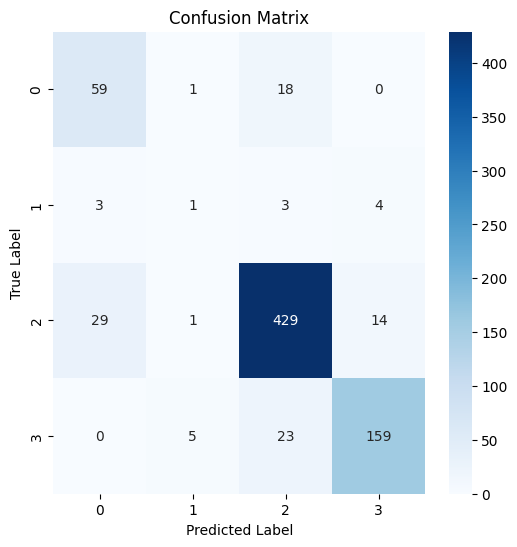

In [18]:
evaluate_model(bert_model, test_loader, loss_fn)

In [16]:
# Initialize the model again (must have the same architecture)
bert_model = DistilBertForSequenceClassification.from_pretrained(model_name, config=bert_config)

# Load the saved weights
bert_model.load_state_dict(torch.load("bert_model_weights.pth"))

# Move model to the same device
bert_model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [17]:
isbns = []
predicted_cats = []

missing_cats = books.loc[(books["simple_categories"].isna()), ["isbn13", "description"]].reset_index(drop=True)

In [18]:
for index, row in tqdm(missing_cats.iterrows()):
    description = clean(row['description'])
    inputs = bert_tokenizer(
        text=description,
        add_special_tokens=True,
        max_length=max_seq_len,
        truncation=True,
        padding=True,
        return_tensors='pt'
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    with torch.no_grad():
        outputs = bert_model(input_ids, attention_mask=attention_mask).logits

    preds = torch.argmax(outputs, dim=1).cpu().numpy()
    predicted_cat = unique_classes[preds[0]]

    isbns.append(row['isbn13'])
    predicted_cats.append(predicted_cat)

1454it [00:10, 139.63it/s]


In [19]:
missing_predicted_df = pd.DataFrame({
    "isbn13": isbns,
    "simple_categories": predicted_cats
})

In [20]:
missing_predicted_df

,isbn13,simple_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1449,9788125026600,Nonfiction
1450,9788171565641,Nonfiction
1451,9788172235222,Fiction
1452,9788173031014,Nonfiction


In [ ]:
books = books.merge(missing_predicted_df, on="isbn13", how="left")
books["simple_categories"] = books["simple_categories_x"].fillna(books["simple_categories_y"])
books = books.drop(columns=["simple_categories_x", "simple_categories_y"])

In [25]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 : A NOVEL THAT READERS and criti...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 : A new 'Christie for Christmas'...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 : A memorable, mesmerizing heroi...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 : Lewis' work on the nature of l...,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 : ""In The Problem of Pain, C.S. ...",Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 : On A Train Journey Home To Nor...,Fiction
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 : This book tells the tale of a ...,Nonfiction
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 : Wisdom to Create a Life of Pas...,Nonfiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 : This collection of the timeles...,Nonfiction


In [29]:
books["simple_categories"].isna().sum()

0

In [30]:
books["simple_categories"].value_counts()

simple_categories
Fiction                  2930
Nonfiction               1643
Children's Fiction        530
Children's Nonfiction      94
Name: count, dtype: int64

In [33]:
books.to_csv("books_with_categories.csv", index=False)